<a href="https://colab.research.google.com/github/Denniskag/Image-Classification/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dataset**

In [ ]:
%ls /content/drive/MyDrive/Internship/Dataset

Lion/  Zebra/


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import cv2

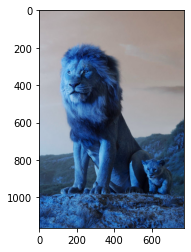

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Internship/Dataset/Lion/lion 003.jpg')
plt.imshow(img)
plt.show()

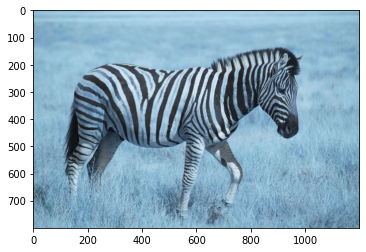

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Internship/Dataset/Zebra/zebra 008.jpg')
plt.imshow(img)
plt.show()

In [ ]:
target = [] 
images = [] 
flat_data = [] 
DATADIR = '/content/drive/MyDrive/Internship/Dataset'

CATEGORIES = ['Lion','Zebra']

for i in CATEGORIES:
  class_target = CATEGORIES.index(i)
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)
    

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

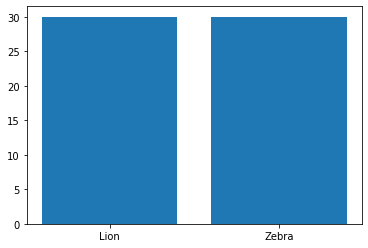

In [ ]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

**Splitting Data into Training and Test data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target, test_size = 0.3,random_state=0)

**Regularization**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid =[
             {'C':[1,10,100,1000], 'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability =True)
clf =GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Predicting**

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[7, 3],
       [1, 7]])

In [ ]:
accuracy_score(y_pred,y_test)

0.7777777777777778

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

In [ ]:
model = pickle.load(open('img_model.p', 'rb'))

Testing on new image

Enter your URLhttps://i.guim.co.uk/img/media/bd4a0e8db1ce3322cfc8a1f4b502711bf35b8cbb/0_30_3000_1800/master/3000.jpg?width=1900&quality=85&auto=format&fit=max&s=24457f7a0081c622a81f5ded5a49c124
(1140, 1900, 3)
Predicted output:Lion


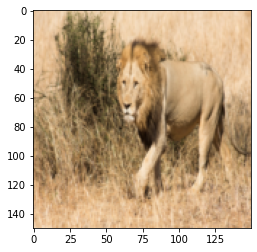

In [ ]:
flat_data = []
url =input('Enter your URL')
img = imread(url)
img_resized = resize(img, (150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized) 
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted output:{y_out}')